# Doppler and Delay Scan

### Configure Ipython

In [1]:
#import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticks
%matplotlib inline
#import custom packages
import oskar, sspals

### Import Data

In [2]:
rid = '20160227_182331'
h5 = oskar.h5_data(rid)             # data
h5.load_log()
out_dire = h5.out_dire("Analysis")  # output

In [3]:
#read data
allDF = h5.load_av(verbose=True, loop=True, exclude=['avL_SSPALS.dat'])
allDF.head()

Loaded: av_SSPALS.dat


,DLY_EA,IR,UV,VOL_u100,VOL_u101,t0_reps,t0_mean,t0_std,t0_sem,DF_reps,...,DF_std,DF_sem,Range_reps,Range_mean,Range_std,Range_sem,FWHM_reps,FWHM_mean,FWHM_std,FWHM_sem
VID,,,,,,,,,,,,,,,,,,,,,
1,5.800000e-07,749.076507,242.650,2000,2000,1098,7.698756e-08,2.510083e-10,7.575075e-12,1098,...,0.008181,0.000247,1098,0.237808,0.015745,0.000475,1098,9.870854e-09,6.252641e-10,1.886958e-11
2,5.800000e-07,749.076507,242.675,2000,2000,997,7.699912e-08,2.432100e-10,7.702540e-12,997,...,0.008176,0.000259,997,0.239513,0.015364,0.000487,997,9.921102e-09,6.302918e-10,1.996154e-11
3,5.800000e-07,749.076507,242.700,2000,2000,998,7.698344e-08,2.491607e-10,7.887045e-12,998,...,0.007944,0.000251,998,0.239498,0.014357,0.000454,998,9.927346e-09,6.064848e-10,1.919794e-11
4,5.800000e-07,749.076507,242.725,2000,2000,999,7.693028e-08,2.417308e-10,7.648024e-12,999,...,0.008124,0.000257,999,0.240316,0.014160,0.000448,999,9.926850e-09,6.215585e-10,1.966524e-11
5,5.800000e-07,749.076507,242.750,2000,2000,997,7.700605e-08,2.338263e-10,7.405354e-12,997,...,0.008519,0.000270,997,0.239673,0.014481,0.000459,997,9.891443e-09,6.308686e-10,1.997981e-11


In [4]:
allDF.describe()

,DLY_EA,IR,UV,VOL_u100,VOL_u101,t0_reps,t0_mean,t0_std,t0_sem,DF_reps,...,DF_std,DF_sem,Range_reps,Range_mean,Range_std,Range_sem,FWHM_reps,FWHM_mean,FWHM_std,FWHM_sem
count,1.350000e+02,1.350000e+02,135.000000,135,135,135.000000,1.350000e+02,1.350000e+02,1.350000e+02,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,1.350000e+02,1.350000e+02,1.350000e+02
mean,5.900000e-07,7.490765e+02,243.200000,2000,2000,1021.133333,7.698056e-08,2.343298e-10,7.335748e-12,1021.133333,...,0.008334,0.000261,1021.133333,0.239368,0.014637,0.000458,1021.133333,9.918680e-09,6.258389e-10,1.959792e-11
std,8.195375e-09,1.483433e-12,0.325889,0,0,42.069204,2.564175e-11,1.020732e-11,3.113371e-13,42.069204,...,0.000230,0.000009,42.069204,0.000867,0.000466,0.000012,42.069204,2.217354e-11,1.387248e-11,6.197004e-13
min,5.800000e-07,7.490765e+02,242.650000,2000,2000,995.000000,7.691248e-08,2.137461e-10,6.631924e-12,995.000000,...,0.007637,0.000239,995.000000,0.237166,0.013484,0.000419,995.000000,9.870854e-09,5.887640e-10,1.789019e-11
25%,5.800000e-07,7.490765e+02,242.925000,2000,2000,997.000000,7.696447e-08,2.276928e-10,7.115546e-12,997.000000,...,0.008176,0.000256,997.000000,0.238846,0.014329,0.000450,997.000000,9.903441e-09,6.165566e-10,1.923322e-11
50%,5.900000e-07,7.490765e+02,243.200000,2000,2000,998.000000,7.698254e-08,2.339381e-10,7.330165e-12,998.000000,...,0.008324,0.000261,998.000000,0.239504,0.014623,0.000459,998.000000,9.918945e-09,6.249657e-10,1.970200e-11
75%,6.000000e-07,7.490765e+02,243.475000,2000,2000,1000.000000,7.699883e-08,2.405779e-10,7.538518e-12,1000.000000,...,0.008504,0.000267,1000.000000,0.240019,0.014922,0.000466,1000.000000,9.934769e-09,6.342876e-10,1.998874e-11
max,6.000000e-07,7.490765e+02,243.750000,2000,2000,1100.000000,7.704423e-08,2.653684e-10,8.391685e-12,1100.000000,...,0.008856,0.000280,1100.000000,0.241440,0.016267,0.000491,1100.000000,9.970790e-09,6.601214e-10,2.078057e-11


## Plot Data

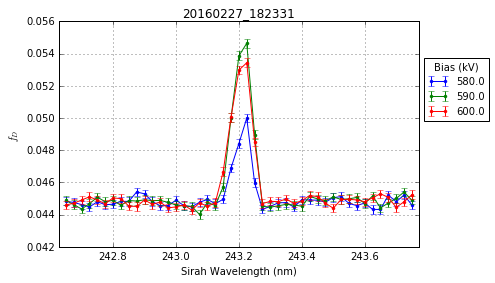

In [5]:
GroupBy = 'DLY_EA'
X = 'UV'
Y = 'DF'
y_append = ''
#plot setup
fig, ax = plt.subplots()

#plot
i = 0
grp = allDF.groupby(GroupBy)
for name, group in grp:
    sg = group.sort_values(by=X)
    x = sg[:][X].values
    y = sg[:][Y+'_mean'+y_append].values
    yerr = sg[:][Y+'_sem'+y_append].values
    ax.errorbar(x, y, yerr=yerr, fmt ='.-', label=name*1e9)

#format
xs = allDF[:][X] # all x values
x_range = xs.max()-xs.min()
ax.set_xlim(xs.min()-x_range*0.02, xs.max()+x_range*0.02)
ax.grid(True)

#legend
lgd = ax.legend(title=r"Bias (kV)", loc='center left', bbox_to_anchor=(1, 0.7), fontsize= 10)

#labels
ax.set_ylabel(r"$f_{D}$ ")
ax.set_xlabel(r"Sirah Wavelength (nm)")
plt.title(rid)

#save data
plt.tight_layout()
fileout = os.path.join(out_dire, "DF.png")
plt.savefig(fileout, dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Signal

In [8]:
#calculate signal for each voltage
for name, group in grp:
    back = group[(group[X] > 243.6) | (group[X] < 242.8)][Y+'_mean'+y_append] #define background
    bk = back.mean()
    bk_sem = back.std()/np.sqrt(back.count())
    sig = sspals.signal(group[Y+'_mean'+y_append].values, group[Y+'_sem'+y_append].values, bk, bk_sem)
    allDF.set_value(group.index.values, 'S', sig[0])
    allDF.set_value(group.index.values, 'S_err', sig[1])

### Fit Parameters

In [9]:
from scipy.optimize import curve_fit
from collections import defaultdict

# Define function
def gauss(x, *p):
    A, x0, sigma = p
    return A*np.exp(-(x-x0)**2/(2.*sigma**2))

# initial guess (A, x0 and sigma)
p0 = [10, 243., 0.2]

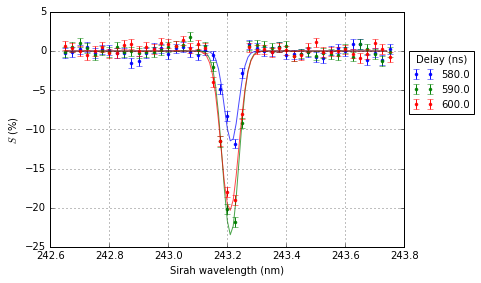

In [18]:
#plot setup
fig, ax = plt.subplots()

#plot
i = 0
fits = defaultdict(list)
grp = allDF.groupby(GroupBy)
for name, group in grp:
    sg = group.sort_values(by=X)
    x = sg[:][X].values
    y = sg[:]['S'].values
    yerr = sg[:]['S_err'].values
    eb = ax.errorbar(x, y, yerr=yerr, fmt='.', 
                    alpha=0.95, label=name*1e9)
    i = i + 1
    
    #fitting
    coeff, cov = curve_fit(gauss, x, y, p0=p0)
    fits[name].append([coeff, np.sqrt(np.diag(cov)), cov])
    xf = np.arange(x.min(), x.max(), 0.01)
    fit = gauss(xf, *coeff)
    line = ax.plot(xf, fit, color=eb[0].get_color(), alpha=0.7)
    
#format
ax.set_ylabel(r"$S$ (%)")
ax.set_xlabel(r"Sirah wavelength (nm)")
ax.grid(True)

#legend
lgd = ax.legend(title="Delay (ns)", loc='center left', bbox_to_anchor=(1, 0.7), fontsize= 10)

#plt.title(RIDS)
plt.tight_layout()

#save data
fileout = os.path.join(out_dire, "S.png")
plt.savefig(fileout, dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [41]:
#extract sigma best fit parameters
for i, key in enumerate(np.sort(fits.keys())):
    row = np.array([key, fits[key][0][0][0], fits[key][0][1][0],
                         fits[key][0][0][1], fits[key][0][1][1],
                         fits[key][0][0][2], fits[key][0][1][2]])
    if i == 0:
        sig = row
    else:
        sig = np.vstack((sig,row))

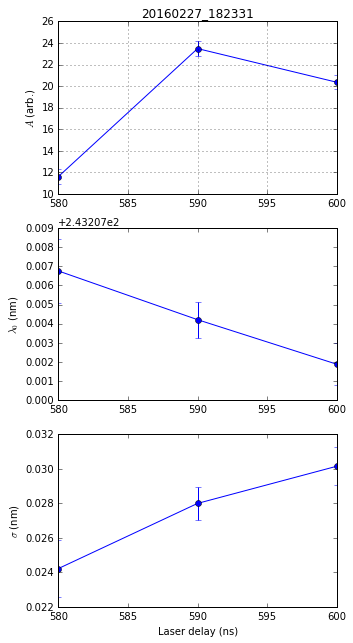

In [45]:
#plot setup
fig, ax = plt.subplots(3,1, figsize=(5,9))

#plot
ax[0].errorbar(sig[:,0]*1e9, abs(sig[:,1]), yerr=sig[:,2], fmt='o-')
ax[1].errorbar(sig[:,0]*1e9, abs(sig[:,3]), yerr=sig[:,4], fmt='o-')
ax[2].errorbar(sig[:,0]*1e9, abs(sig[:,5]), yerr=sig[:,6], fmt='o-')

#format
ax[0].set_ylabel("$A$ (arb.)")
ax[1].set_ylabel("$\lambda_0$ (nm)")
ax[2].set_ylabel("$\sigma$ (nm)")
ax[2].set_xlabel("Laser delay (ns)")
ax[0].grid(True)
ax[0].set_title(rid)

#save data
plt.tight_layout()
fileout = os.path.join(out_dire, "Gauss_fitpars.png")
plt.savefig(fileout, dpi=300,bbox_inches='tight')